<a href="https://colab.research.google.com/github/Malbasahi/TechnoHacks_Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

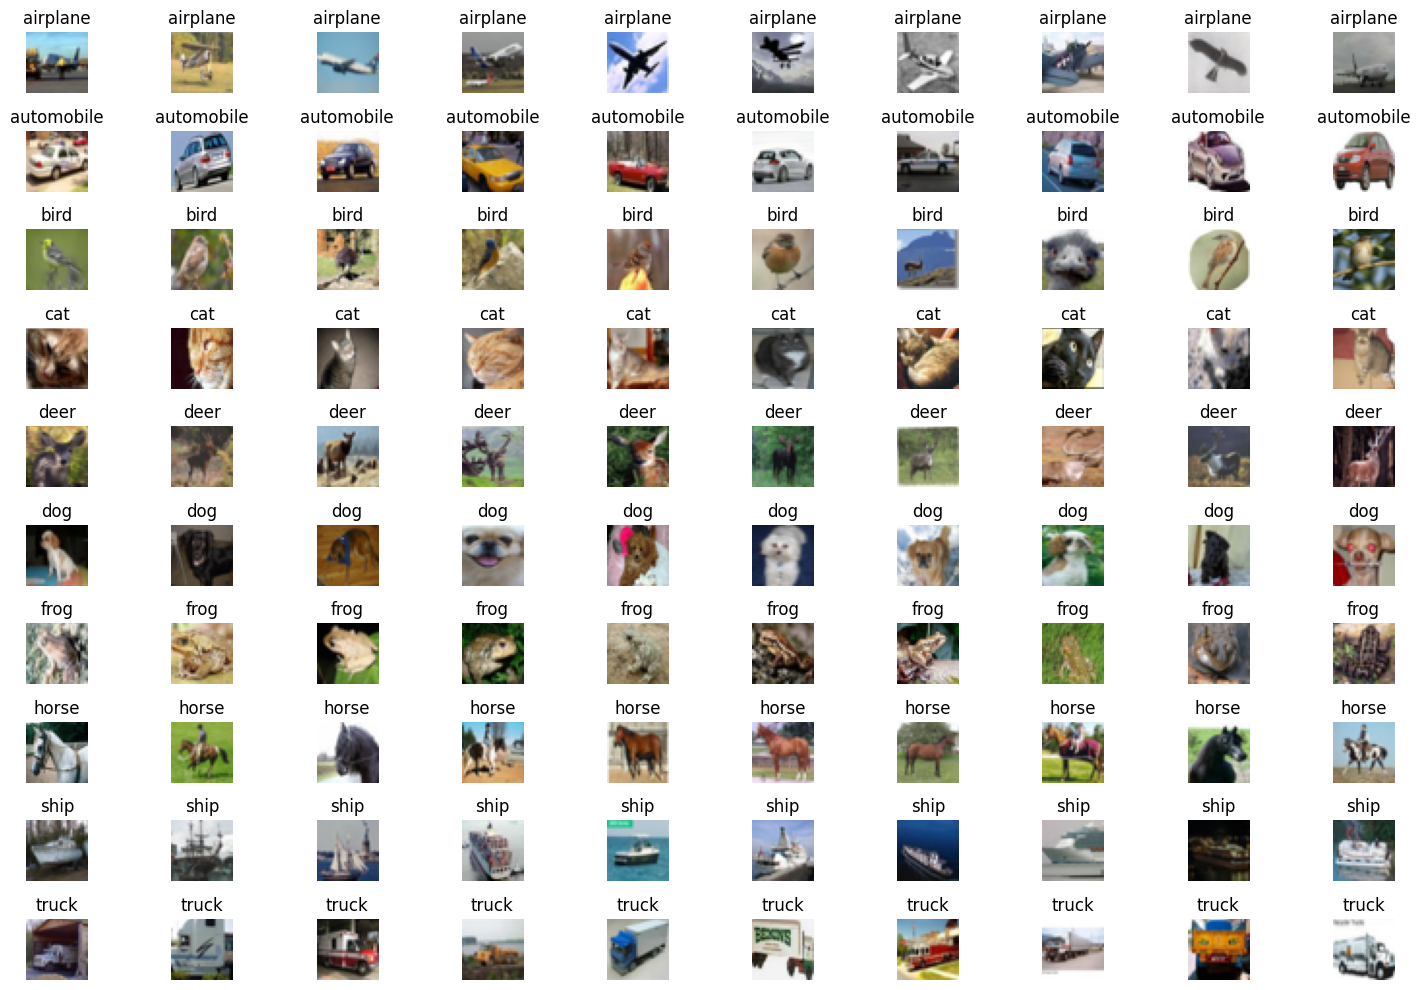

In [ ]:
# Create a dictionary to store images for each class
class_images = {class_name: [] for class_name in class_names}

# Sort images into their respective classes
for i in range(len(train_labels)):
    class_name = class_names[train_labels[i][0]]
    class_images[class_name].append(train_images[i])

# Plot 10 random images from each class
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    images = class_images[class_name]
    random_indices = np.random.choice(len(images), 10, replace=False)
    for j, index in enumerate(random_indices):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(images[index])
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout layer with a dropout rate of 0.5
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 169s 108ms/step - loss: 1.5689 - accuracy: 0.4223 - val_loss: 1.3204 - val_accuracy: 0.5270
Epoch 2/50
1563/1563 [==============================] - 165s 106ms/step - loss: 1.1935 - accuracy: 0.5736 - val_loss: 1.0591 - val_accuracy: 0.6292
Epoch 3/50
1563/1563 [==============================] - 166s 106ms/step - loss: 1.0368 - accuracy: 0.6342 - val_loss: 0.9563 - val_accuracy: 0.6637
Epoch 4/50
1563/1563 [==============================] - 172s 110ms/step - loss: 0.9392 - accuracy: 0.6701 - val_loss: 0.8898 - val_accuracy: 0.6974
Epoch 5/50
1563/1563 [==============================] - 164s 105ms/step - loss: 0.8692 - accuracy: 0.6923 - val_loss: 0.8369 - val_accuracy: 0.7106
Epoch 6/50
1563/1563 [==============================] - 159s 102ms/step - loss: 0.8092 - accuracy: 0.7167 - val_loss: 0.8182 - val_accuracy: 0.7128
Epoch 7/50
1563/1563 [==============================] - 161s 103ms/step - loss: 0.7626 - accuracy: 0.7310 - val_

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 8s - loss: 0.7198 - accuracy: 0.7580 - 8s/epoch - 24ms/step

Test accuracy: 0.7580000162124634


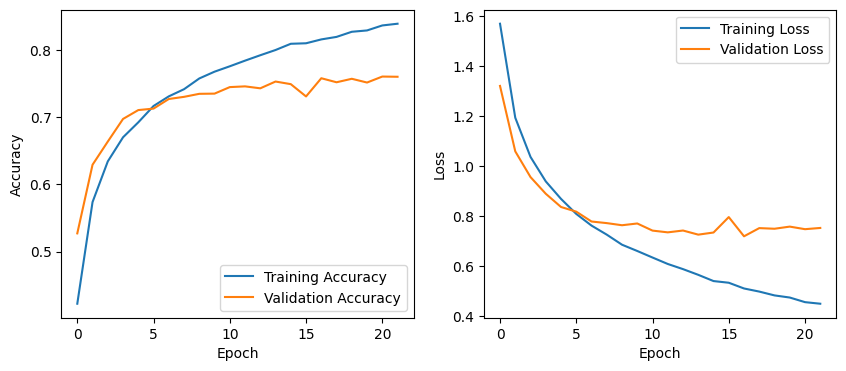

In [ ]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 10s 33ms/step


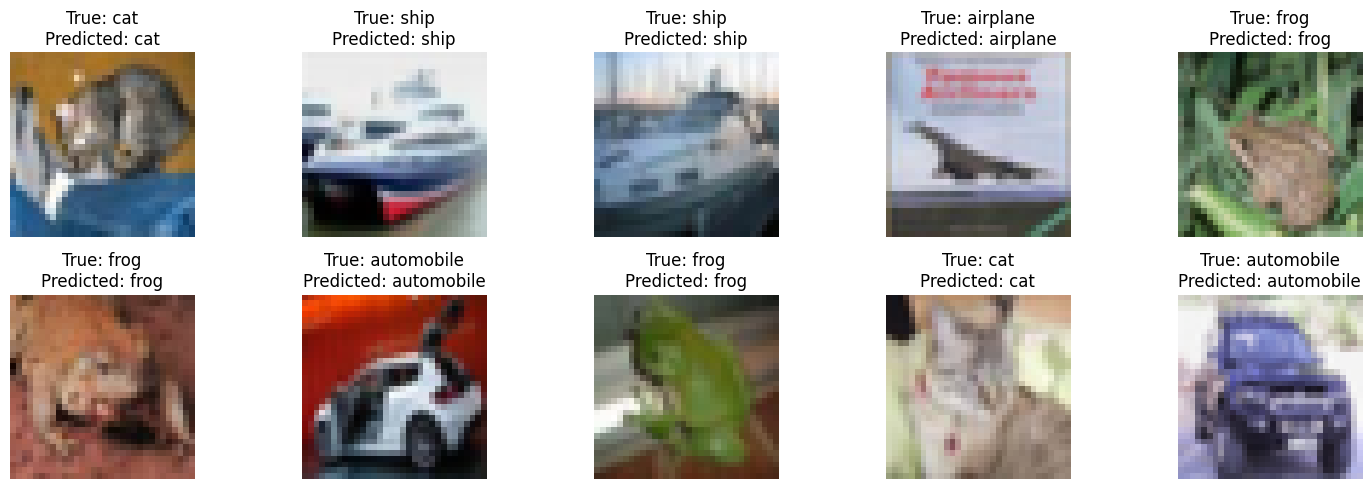

In [73]:
# Make predictions on the preprocessed test images
predictions = model.predict(test_images)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Define class names (if not already defined)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define the number of images to display
num_images_to_display = 10

# Plot a few test images along with their predicted classes
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[test_labels[i][0]]}\nPredicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()